In [233]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn
import json

In [5]:
cid = '6f03a619b5424c0b92f9ce0dcb2841b3'
secret = '088dc108f86c4ae6ba1b3d3960d3fc20'


In [239]:
with open('spotipy_cred.json','r') as f:
    data = json.load(f) 
data

{'SPOTIPY_CLIENT_ID': '6f03a619b5424c0b92f9ce0dcb2841b3',
 'SPOTIPY_CLIENT_SECRET': '088dc108f86c4ae6ba1b3d3960d3fc20'}

In [240]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=data['SPOTIPY_CLIENT_ID'], client_secret=data['SPOTIPY_CLIENT_SECRET'])
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [9]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [45]:
playlist_list = []
features_list = []
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    
    #Track name
    track_name = track["track"]["name"]
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    
    
    playlist_list.append(
        [track_uri, track_name, artist_uri, artist_info, artist_name, artist_pop, artist_genres, album, track_pop]
    )
    features_list.append(pd.DataFrame(sp.audio_features(track["track"]["uri"])))

In [46]:
playlist_df = pd.DataFrame(data = playlist_list, columns = ['track_uri', 'track_name', 'artist_uri',
                                              'artist_info', 'artist_name', 'artist_pop',
                                              'artist_genres', 'album', 'track_pop'])
full_music = playlist_df.merge(pd.concat(features_list), left_on = 'track_uri', right_on = 'uri')
full_music.head(2)

,track_uri,track_name,artist_uri,artist_info,artist_name,artist_pop,artist_genres,album,track_pop,danceability,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",spotify:artist:716NhGYqD1jl2wI1Qkgq36,{'external_urls': {'spotify': 'https://open.sp...,Bizarrap,87,"[argentine hip hop, pop venezolano, trap argen...","Quevedo: Bzrp Music Sessions, Vol. 52",100,0.621,...,0.230,0.550,128.033,audio_features,2tTmW7RDtMQtBk7m2rYeSw,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,https://api.spotify.com/v1/tracks/2tTmW7RDtMQt...,https://api.spotify.com/v1/audio-analysis/2tTm...,198938,4
1,spotify:track:0skYUMpS0AcbpjcGsAbRGj,Pink Venom,spotify:artist:41MozSoPIsD1dJM0CLPjZF,{'external_urls': {'spotify': 'https://open.sp...,BLACKPINK,83,"[k-pop, k-pop girl group]",Pink Venom,89,0.798,...,0.259,0.745,90.031,audio_features,0skYUMpS0AcbpjcGsAbRGj,spotify:track:0skYUMpS0AcbpjcGsAbRGj,https://api.spotify.com/v1/tracks/0skYUMpS0Acb...,https://api.spotify.com/v1/audio-analysis/0skY...,186964,4


In [77]:
full_music.artist_genres.iloc[0]

['argentine hip hop', 'pop venezolano', 'trap argentino']

In [85]:
def genre_list_extractor(genre_series):
    genre_set = set()
    for i in genre_series:
        for gen in i:
            genre_set.add(gen)
    genre_dict = dict()
    for i in genre_set:
         genre_dict[i] = genre_series.apply(lambda x:  1 if i in x else 0)
    return pd.DataFrame(genre_dict)

In [201]:

categorical_music.head(1)

,baroque pop,viral pop,canadian hip hop,trap argentino,dfw rap,toronto rap,pop,latin pop,post-teen pop,pop dance,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,0,1,0,0,0,0,0,0,...,0.23,0.55,128.033,audio_features,2tTmW7RDtMQtBk7m2rYeSw,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,https://api.spotify.com/v1/tracks/2tTmW7RDtMQt...,https://api.spotify.com/v1/audio-analysis/2tTm...,198938,4


In [163]:
categorical_music.columns

Index(['baroque pop', 'viral pop', 'canadian hip hop', 'trap argentino',
       'dfw rap', 'toronto rap', 'pop', 'latin pop', 'post-teen pop',
       'pop dance', 'trap queen', 'uk dance', 'shimmer pop', 'rock',
       'reggaeton colombiano', 'reggaeton', 'pop rock', 'afrofuturism',
       'trap latino', 'shiver pop', 'tropical house', 'permanent wave',
       'argentine hip hop', 'electro house', 'progressive house',
       'r&b en espanol', 'electropop', 'house', 'new wave pop',
       'reggaeton flow', 'art rock', 'australian hip hop', 'urbano espanol',
       'mellow gold', 'escape room', 'edm', 'hip pop', 'alt z', 'latin',
       'hip hop', 'spanish hip hop', 'modern alternative rock',
       'singer-songwriter', 'r&b', 'canadian pop', 'piano rock', 'chill pop',
       'canadian contemporary r&b', 'mambo chileno', 'minnesota hip hop',
       'melodic rap', 'modern rock', 'rap', 'uk pop', 'colombian pop',
       'deep groove house', 'indietronica', 'pop rap', 'pop venezolano',
    

'One Kiss (with Dua Lipa)'

In [216]:

typed = categorical_music.dtypes.reset_index()
catergories = list(typed[typed[0] != 'object']['index'].unique())
catergories.append('track_name')
numeric_mus = categorical_music[catergories]
numeric_mus.head(2)


,baroque pop,viral pop,canadian hip hop,trap argentino,dfw rap,toronto rap,pop,latin pop,post-teen pop,pop dance,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_name
0,0,0,0,1,0,0,0,0,0,0,...,1,0.0440,0.0125,0.033,0.230,0.550,128.033,198938,4,"Quevedo: Bzrp Music Sessions, Vol. 52"
1,0,0,0,0,0,0,0,0,0,0,...,1,0.0891,0.0202,0.000,0.259,0.745,90.031,186964,4,Pink Venom


C:\Users\zroga\anaconda3\envs\science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zroga\anaconda3\envs\science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zroga\anaconda3\envs\science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zroga\anaconda3\envs\science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarn

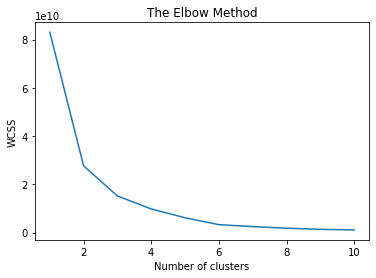

In [225]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import numpy as np
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(numeric_mus.drop(columns = ['track_name']))
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [226]:
[(wcss[x] - wcss[x+1])/(wcss[x+1]) for x in range(0, len(wcss) -1)]

[2.0012051313224775,
 0.8238370108382232,
 0.5481048558204793,
 0.5972823914084043,
 0.86236467783577,
 0.33069020078737493,
 0.35876810014604626,
 0.3611286299247456,
 0.2099978671623792]

In [221]:
def cluster_data(data, n):
    new_df = pd.DataFrame()
    kmeans = KMeans(n_clusters=n, random_state=0)
    new_df['cluster'] = kmeans.fit_predict(data)
    
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    
    centroids = kmeans.cluster_centers_
    
    x_mapper = dict()
    y_mapper = dict()
    for i in range(0,n):
        x_mapper[i] = cen_x[0]
        y_mapper[i] = cen_y[0]
    
    new_df['cen_x'] = new_df.cluster.apply(lambda x:  x_mapper[x])
    new_df['cen_y'] = new_df.cluster.apply(lambda x:  y_mapper[x])
    
    return new_df

In [228]:


clustered =  pd.concat([numeric_mus, 
            cluster_data(numeric_mus.drop(columns = ['track_name']), 3)],
           axis=1)
clustered.head(2)

C:\Users\zroga\anaconda3\envs\science\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,baroque pop,viral pop,canadian hip hop,trap argentino,dfw rap,toronto rap,pop,latin pop,post-teen pop,pop dance,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_name,cluster,cen_x,cen_y
0,0,0,0,1,0,0,0,0,0,0,...,0.033,0.230,0.550,128.033,198938,4,"Quevedo: Bzrp Music Sessions, Vol. 52",1,0.071429,0.071429
1,0,0,0,0,0,0,0,0,0,0,...,0.000,0.259,0.745,90.031,186964,4,Pink Venom,1,0.071429,0.071429


In [229]:


#colors = ['#DF2020', '#81DF20', '#2095DF']
colors = ['r', 'g', 'b','y', 'o', 'i']
clustered['c'] = clustered.cluster.apply(lambda x: colors[x])
clustered.head(2)

,baroque pop,viral pop,canadian hip hop,trap argentino,dfw rap,toronto rap,pop,latin pop,post-teen pop,pop dance,...,liveness,valence,tempo,duration_ms,time_signature,track_name,cluster,cen_x,cen_y,c
0,0,0,0,1,0,0,0,0,0,0,...,0.230,0.550,128.033,198938,4,"Quevedo: Bzrp Music Sessions, Vol. 52",1,0.071429,0.071429,g
1,0,0,0,0,0,0,0,0,0,0,...,0.259,0.745,90.031,186964,4,Pink Venom,1,0.071429,0.071429,g


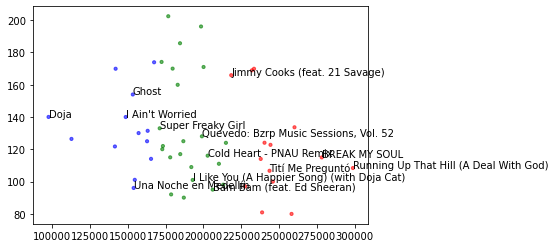

In [231]:
import matplotlib.pyplot as plt
plt.scatter(clustered.duration_ms, clustered.tempo, c=clustered.c, alpha = 0.6, s=10)

for i, row in clustered.iterrows():
    if i%4 == 0:
        plt.text(row.duration_ms, row.tempo, row.track_name)
plt.show()



In [8]:
results = sp.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Expected id of type artist but found type track spotify:track:2tTmW7RDtMQtBk7m2rYeSw
HTTP Error for GET to https://api.spotify.com/v1/artists/2tTmW7RDtMQtBk7m2rYeSw/albums with Params: {'album_type': 'album', 'country': None, 'limit': 20, 'offset': 0} returned 404 due to non existing id


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/artists/2tTmW7RDtMQtBk7m2rYeSw/albums?album_type=album&limit=20&offset=0:
 non existing id, reason: None

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

ModuleNotFoundError: No module named 'seaborn'